In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ctgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df =pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.836120,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
X = df.loc[:, df.columns !=  'DEATH_EVENT']
Y = df['DEATH_EVENT']

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

In [ ]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
criterion='gini', max_depth=2, max_features='auto',
max_leaf_nodes=None, max_samples=None,
min_impurity_decrease=0.0,
min_samples_leaf=2, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=100,
n_jobs=None, oob_score=False, random_state=None,  verbose=0, warm_start=False)
classifier = rf

In [ ]:
#Splitting mixed Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        37
           1       1.00      0.39      0.56        23

    accuracy                           0.77        60
   macro avg       0.86      0.70      0.70        60
weighted avg       0.83      0.77      0.73        60



In [ ]:
df_one = df[df['DEATH_EVENT']==1]
df_one
X_one = df.loc[:, df_one.columns !=  'DEATH_EVENT']

In [ ]:
# from ctgan import CTGANSynthesizer
# ctgan = CTGANSynthesizer()
# # Train the model
# ctgan.fit(X_one, discrete_columns=('anaemia','diabetes','high_blood_pressure','sex','smoking'))
# # Once trained generate samples
# samples = ctgan.sample(107)
# # samples = samples[samples['DEATH_EVENT'] ==1.0]
# ctgan_result_df = pd.concat([df,samples])
# ctgan_result_df.head()

In [ ]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()
# Train the model
ctgan.fit(X_one, discrete_columns=('anaemia','diabetes','high_blood_pressure','sex','smoking'))
# Once trained generate samples
samples = ctgan.sample(107)
samples.describe()
# # samples = samples[samples['DEATH_EVENT'] ==1.0]
# ctgan_result_df = pd.concat([df,samples])
# ctgan_result_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,59.869159,0.411215,645.542056,0.467290,36.757009,0.457944,337971.476636,1.896094,141.626168,0.616822,0.299065,62.084112
std,13.694155,0.494370,1193.809617,0.501277,12.175479,0.500573,122034.415190,1.796217,5.548284,0.488449,0.460003,87.998083
min,31.000000,0.000000,-1358.000000,0.000000,8.000000,0.000000,24928.000000,-0.092975,124.000000,0.000000,0.000000,-78.000000
25%,52.000000,0.000000,151.500000,0.000000,31.000000,0.000000,253192.000000,0.921017,139.000000,0.000000,0.000000,-17.500000
50%,58.000000,0.000000,341.000000,0.000000,36.000000,0.000000,328844.000000,1.314331,142.000000,1.000000,0.000000,44.000000
75%,65.500000,1.000000,834.000000,1.000000,40.500000,1.000000,382000.500000,2.334383,145.000000,1.000000,1.000000,137.000000
max,105.000000,1.000000,10144.000000,1.000000,77.000000,1.000000,707432.000000,10.298677,151.000000,1.000000,1.000000,285.000000


In [ ]:
samples['DEATH_EVENT'] = 1
samples

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,58,1,328,1,38,1,584224,1.105440,136,1,1,18,1
1,53,0,-159,1,59,0,233521,0.806545,126,1,1,-33,1
2,79,0,-1358,0,33,1,462078,2.614796,137,1,0,138,1
3,58,1,371,0,31,1,278744,5.453678,136,0,0,145,1
4,89,0,576,1,23,1,488844,0.107656,140,1,0,-64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,71,0,210,0,42,0,315969,1.511816,139,1,0,198,1
103,76,0,1409,1,21,1,179440,1.288446,141,1,0,-55,1
104,31,0,220,0,35,1,342412,0.516818,150,1,1,-51,1
105,47,0,247,0,33,0,249577,1.115041,141,0,0,97,1


In [ ]:
ctgan_result_df = pd.concat([df,samples])
ctgan_result_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,60.581281,0.426108,598.628079,0.431034,37.733990,0.379310,283022.162562,1.526237,137.943350,0.640394,0.315271,112.293103,0.500000
std,12.384261,0.495120,1032.728206,0.495832,11.924792,0.485814,109633.046989,1.296525,5.220022,0.480477,0.465197,85.811164,0.500617
min,31.000000,0.000000,-1358.000000,0.000000,8.000000,0.000000,24928.000000,-0.092975,113.000000,0.000000,0.000000,-78.000000,0.000000
25%,51.250000,0.000000,123.000000,0.000000,30.000000,0.000000,220000.000000,0.900000,135.000000,0.000000,0.000000,41.250000,0.000000
50%,60.000000,0.000000,288.000000,0.000000,37.500000,0.000000,263358.000000,1.100000,138.000000,1.000000,0.000000,108.000000,0.500000
75%,68.000000,1.000000,582.000000,1.000000,42.000000,1.000000,332654.500000,1.600000,141.000000,1.000000,1.000000,187.000000,1.000000
max,105.000000,1.000000,10144.000000,1.000000,80.000000,1.000000,850000.000000,10.298677,151.000000,1.000000,1.000000,285.000000,1.000000


In [ ]:
X = ctgan_result_df.loc[:, ctgan_result_df.columns !=  'DEATH_EVENT']
Y = ctgan_result_df['DEATH_EVENT']

In [ ]:
#Splitting mixed Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=150)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.86      0.79      0.83        39

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



In [ ]:
ctgan_result_df.to_csv("ctgan_result_oversampling.csv")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


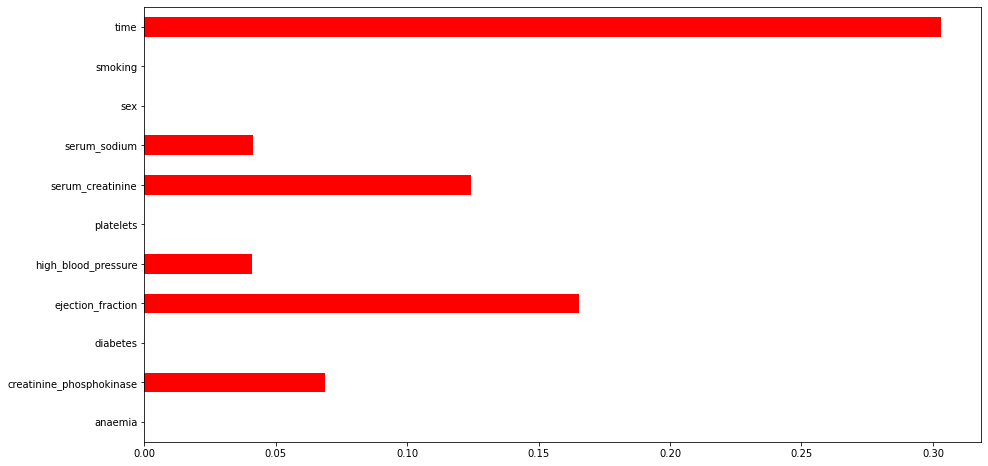

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,Y)
feat_features = pd.Series(importances,X.columns)
feat_features.plot(kind = 'barh', color = 'red',figsize = (15,8))
plt.show()

In [ ]:
ctgan_result_df_two_features = ctgan_result_df[['creatinine_phosphokinase',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'time',	'DEATH_EVENT']]
X = ctgan_result_df_two_features.loc[:, ctgan_result_df_two_features.columns !=  'DEATH_EVENT']
Y = ctgan_result_df_two_features[['DEATH_EVENT']]
#Splitting mixed Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=150)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print(classification_report(Y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.82      0.93      0.87        43
           1       0.91      0.77      0.83        39

    accuracy                           0.85        82
   macro avg       0.86      0.85      0.85        82
weighted avg       0.86      0.85      0.85        82

